In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('movies.csv')
df.dropna(inplace=True)  #DROP NA VALUES

In [3]:
#CONVERTING FLOAT TO INT VALUES
col = []
for item in df.columns:
   if(df[item].dtype=='float'):
    col.append(item)
    
col.remove('score') # Removing score because score should be in float

for item in col:
    df[item] = df[item].astype('int')

#CONVERTING FLOAT TO INT VALUES


In [5]:

#Formatting Date Column and adding Country Column 

for i in df.index:
    ls = df.loc[i,'released'].index('(') + 1
    df.loc[i,'Country'] = df.loc[i,'released'][ls:-1]
    df.loc[i,'released'] = df.loc[i,'released'][:ls-1]

#CONVERTING released column TO Date VALUES
df['released'] = pd.to_datetime(df['released'], infer_datetime_format=True)
pd.to_datetime(df['released'],format = "%Y-%m-%d")


0      1980-06-13
1      1980-07-02
2      1980-06-20
3      1980-07-02
4      1980-07-25
          ...    
7648   2020-01-17
7649   2020-02-14
7650   2020-01-17
7651   2020-02-21
7652   2020-08-28
Name: released, Length: 5421, dtype: datetime64[ns]

In [72]:
# REMOVING UNNECESSARY RATING 
filt= df['rating'] == 'X'
df.drop(df[filt].index,inplace=True)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Country,profit
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,United States,27998772
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,United States,54353106
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,United States,520375067
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,United States,79953539
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,United States,33846344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,2020-01-17,6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,United States,336505244
7649,Sonic the Hedgehog,PG,Action,2020,2020-02-14,6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,United States,234715683
7650,Dolittle,PG,Adventure,2020,2020-01-17,5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,United States,70487753
7651,The Call of the Wild,PG,Adventure,2020,2020-02-21,6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,United States,-23894503


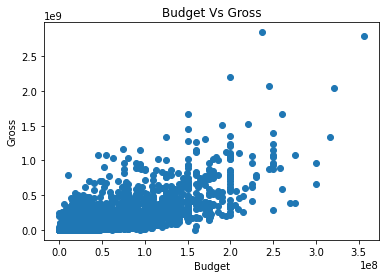

In [15]:
#Analyze Budget and gross relations

plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget Vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

plt.show()

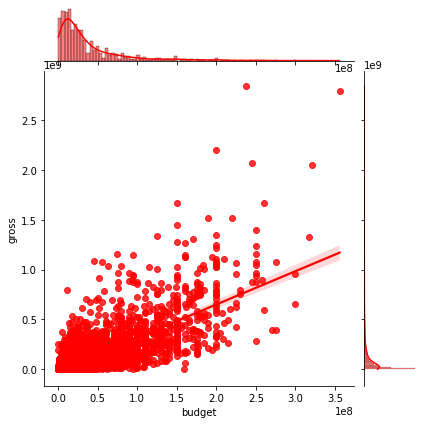

In [31]:
sns.jointplot(x="budget",y="gross",data=df, kind="reg",palette = "rocket",color="red")
plt.show()

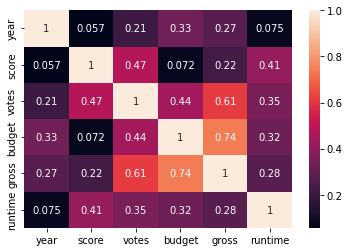

In [38]:
#Corelation among columns

sns.heatmap(df.corr(),annot=True)
plt.show()

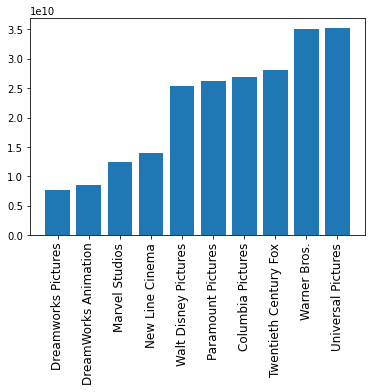

In [71]:
# Profit Attained by Each Company

df['profit'] = df['gross'] - df['budget']

res = df.groupby('company').agg({'profit' :'sum','name' : 'count','score' : 'mean' }).sort_values(by="profit")
res = res[-10:]
plt.bar(res.index,res['profit'])
plt.xticks(size=12,rotation='vertical')
plt.show()

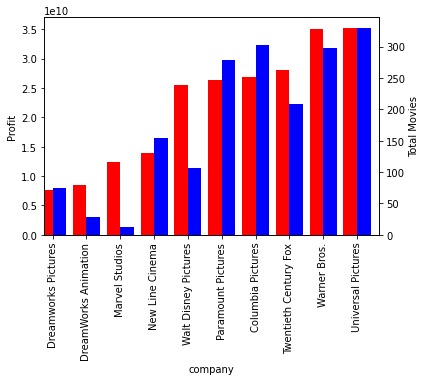

In [70]:

# How many movies were released for to attain the profit for every company 

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

res.profit.plot(kind='bar', color='red', ax=ax, width=width, position=1)
res.name.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Profit')
ax2.set_ylabel('Total Movies')

plt.show()

# We can see some great insights that companies like MARVEL,WALT DISNEY.... has earned significantly high profit 
# with less movies as compared to other production houses, ON the other side companies like PARAMOUNT,COLOMBIA 
# Earned less profits given their total releases 
